In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from classy import *

Keras not installed
Version:  0.0.21


In [3]:
images=image.load_images('train_pieces')
summary(images)

[black]: 35 files found
[red]: 34 files found
[white]: 21 files found
Images
90 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'


In [4]:
data_train=image.images_to_patch_vectors(images,(1,1),grayscale=False,verbose=False)
data_train.vectors/=255
summary(data_train)

88740 vectors of length 3
Feature names: 'r0', 'g0', 'b0'
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.5602591  0.48187399 0.46088905]
Median:  [0.68627451 0.38431373 0.38431373]
Stddev:  [0.20997308 0.21398463 0.2014368 ]


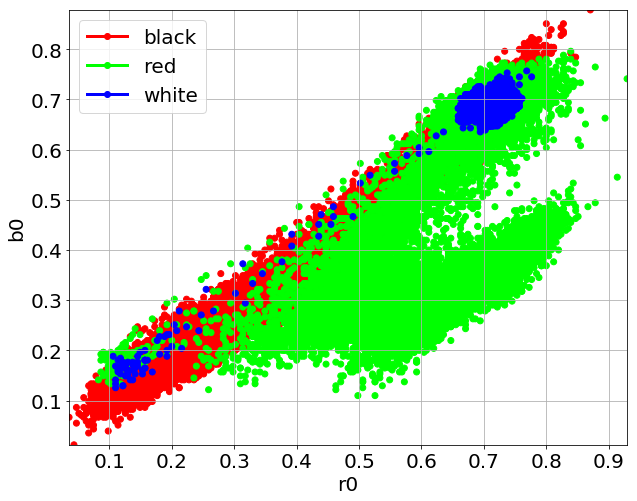

In [5]:
subset=extract_features(data_train,[0,2])
plot2D(subset,legend_location='upper left')

In [ ]:
plot_feature_combinations(data_train)

### classification

In [5]:
images=image.load_images('train_pieces')
summary(images)

data_train=image.images_to_patch_vectors(images,(1,1),grayscale=False,verbose=False)
data_train.vectors/=255
summary(data_train)

[black]: 48 files found
[red]: 48 files found
[white]: 32 files found
Images
128 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
126208 vectors of length 3
Feature names: 'r0', 'g0', 'b0'
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.57303629 0.49456938 0.4721105 ]
Median:  [0.69411765 0.40784314 0.4       ]
Stddev:  [0.20504378 0.21451377 0.20104832]


In [6]:
images=image.load_images('test_pieces')
summary(images)

data_test=image.images_to_patch_vectors(images,(1,1),grayscale=False,verbose=False)
data_test.vectors/=255
summary(data_test)

[black]: 10 files found
[red]: 8 files found
[white]: 14 files found
Images
32 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
31552 vectors of length 3
Feature names: 'r0', 'g0', 'b0'
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.60250132 0.55586359 0.52811344]
Median:  [0.72156863 0.7254902  0.68235294]
Stddev:  [0.20859603 0.22205224 0.21132503]


In [7]:
C=NaiveBayes()

In [8]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.02197575569152832 seconds 


In [9]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 81.64934077079108


In [10]:
C=kNearestNeighbor()

In [11]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.14714789390563965 seconds 


In [12]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 61.6981490872211


## try a larger patch

In [13]:
images=image.load_images('train_pieces')
summary(images)

data_train=image.images_to_patch_vectors(images,(2,2),grayscale=False,verbose=False)
data_train.vectors/=255
summary(data_train)

[black]: 48 files found
[red]: 48 files found
[white]: 32 files found
Images
128 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
118272 vectors of length 12
Feature names: 'r0', 'r1', 'r2', 'r3', 'g0', 'g1', 'g2', 'g3', 'b0', 'b1', 'b2', 'b3'
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.56835596 0.4861955  0.46423532 0.57072952 0.48892805 0.46685228
 0.57149465 0.4921742  0.4697793  0.57387242 0.49488292 0.47237415]
Median:  [0.69411765 0.39215686 0.39215686 0.69411765 0.39607843 0.39215686
 0.69411765 0.40392157 0.39607843 0.69411765 0.40784314 0.4       ]
Stddev:  [0.20698245 0.21333389 0.19972666 0.20603464 0.21371383 0.20005854
 0.20518945 0.21391328 0.20039443 0.20419216 0.21420612 0.20065012]


In [14]:
images=image.load_images('test_pieces')
summary(images)

data_test=image.images_to_patch_vectors(images,(2,2),grayscale=False,verbose=False)
data_test.vectors/=255
summary(data_test)

[black]: 10 files found
[red]: 8 files found
[white]: 14 files found
Images
32 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
29568 vectors of length 12
Feature names: 'r0', 'r1', 'r2', 'r3', 'g0', 'g1', 'g2', 'g3', 'b0', 'b1', 'b2', 'b3'
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.59919282 0.55020717 0.522803   0.60035173 0.55091103 0.52353233
 0.60104777 0.55480236 0.5269645  0.60224726 0.55557678 0.52775205]
Median:  [0.72156863 0.72156863 0.67843137 0.72156863 0.7254902  0.67843137
 0.72156863 0.7254902  0.68235294 0.72156863 0.7254902  0.68235294]
Stddev:  [0.21060536 0.22322735 0.21235428 0.20982674 0.22291016 0.2121361
 0.2090459  0.22231474 0.21157733 0.20818922 0.22193926 0.21131232]


In [15]:
C=NaiveBayes()

In [16]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.04222393035888672 seconds 


In [17]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 83.05938852813853


## How about the entire image?

In [5]:
images=image.load_images('train_pieces')
summary(images)

data_train=image.images_to_vectors(images)
data_train.vectors/=255
summary(data_train)

[black]: 35 files found
[red]: 34 files found
[white]: 21 files found
Images
90 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
90 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [145.21111111 129.32222222 123.92222222 ... 175.33333333 174.18888889
 166.8       ]
Median:  [178.  118.  118.5 ... 183.  188.  179.5]
Stddev:  [55.71026126 57.40302504 55.44491316 ... 26.96829414 37.64863711
 36.07867945]
90 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.56945534 0.50714597 0.4859695  ... 0.6875817  0.68309368 0.65411765]
Median:  [0.69803922 0.4627451  0.46470588 ... 0.71764706 0.7372549  0.70392157]
Stddev:  [0.21847161 0.2251099  0.21743103

In [6]:
images=image.load_images('test_pieces')
summary(images)

data_test=image.images_to_vectors(images)
data_test.vectors/=255
summary(data_test)

[black]: 13 files found
[red]: 14 files found
[white]: 11 files found
Images
38 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
38 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [153.07894737 137.92105263 132.44736842 ... 182.63157895 182.42105263
 174.52631579]
Median:  [174.5 170.  166.5 ... 185.  189.  180. ]
Stddev:  [45.85123633 54.16999635 51.68207333 ... 13.20968754 25.04903778
 23.06710673]
38 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.6003096  0.54086687 0.51940144 ... 0.71620227 0.71537668 0.68441692]
Median:  [0.68431373 0.66666667 0.65294118 ... 0.7254902  0.74117647 0.70588235]
Stddev:  [0.17980877 0.21243136 0.2026748 

In [7]:
C=NaiveBayes()

In [8]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.005218029022216797 seconds 


In [9]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 97.36842105263158


In [10]:
C.means.shape

(3, 2958)

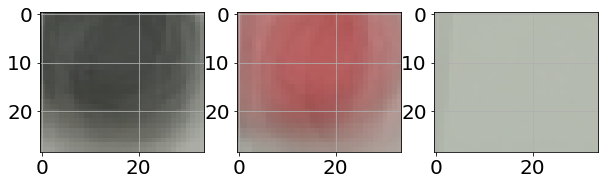

In [11]:
subplot(1,3,1)
im=image.vector_to_image(C.means[0],(29, 34, 3))

subplot(1,3,2)
im=image.vector_to_image(C.means[1],(29, 34, 3))

subplot(1,3,3)
im=image.vector_to_image(C.means[2],(29, 34, 3))


In [12]:
data_test.target_names

['black', 'red', 'white']

In [13]:
C=CSC()

In [14]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.13652610778808594 seconds 


In [15]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 100.0
